In [1]:
from insight_analyzer import *


analyzer = AnomalyAnalyzer(workspace="6dc62a5d50124f0dae3b0db307289ad1",result_id="9722166f9b3280dbae14485f872f7e51bad9dcb9")

Ok, first we want to validate the data, if we can run the anomaly scan on it.

In [2]:
df = analyzer.get_df()

In [3]:
df.head(5)

,m_temperature_avg_4aa40654
2013-07-28 00:00:00,72.139958
2013-07-28 01:00:00,72.76124
2013-07-28 02:00:00,None
2013-07-28 03:00:00,72.782389
2013-07-28 04:00:00,71.892901


OK, now let's do first iteration of the parameters, to see how it would look like on the demo data!

In [4]:
window = 3
sensitivity = 1
persist_model = PersistAD(window = window, c = sensitivity, side = "both")
anomalies = persist_model.fit_detect(df)

Now let's plot it, so we can see it!

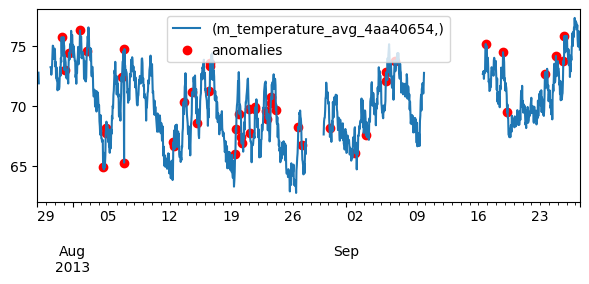

In [5]:
fig, ax = plt.subplots(figsize=(7, 2.5))
df.plot(ax=ax, label="data")
anomalies = anomalies.fillna(False)

# Filter the data using the anomalies binary mask to get the anomaly values.
anomaly_values = df[anomalies]

# Use scatter to plot the anomalies as points.
ax.scatter(anomaly_values.index, anomaly_values, color="red", label="anomalies")

ax.legend()

That is meaby a bit too sensitive, let's tone it down a little. 2.5 should suffice.

In [6]:
sensitivity = 2.5
seasonal_ad = PersistAD(window= 3, c=sensitivity, side="both")
anomalies = seasonal_ad.fit_detect(df)

Let's see how the data looks like now!

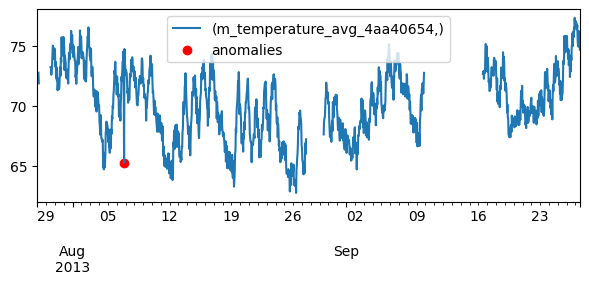

In [7]:
fig, ax = plt.subplots(figsize=(7, 2.5))
df.plot(ax=ax, label="data")
anomalies = anomalies.fillna(False)

# Filter the data using the anomalies binary mask to get the anomaly values.
anomaly_values = df[anomalies]

# Use scatter to plot the anomalies as points.
ax.scatter(anomaly_values.index, anomaly_values, color="red", label="anomalies")

ax.legend()

That looks much better, now let's push to it the server, so we can see it in our dashboard

In [8]:
analyzer.push_to_server(anomalies)

Success!
